### Content
- The dataset contains several parameters which are considered important during the application for Masters Programs.
- The parameters included are :

- 1.GRE Scores ( out of 340 )
- 2.TOEFL Scores ( out of 120 )
- 3.University Rating ( out of 5 )
- 4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- 5.Undergraduate GPA ( out of 10 )
- 6.Research Experience ( either 0 or 1 )
- 7.Chance of Admit ( ranging from 0 to 1 )

##### *GRE*
- The Graduate Record Examinations (GRE) is a standardized test that is an admissions requirement for many graduate       schools in the United States and Canada.The GRE is owned and administered by Educational Testing Service (ETS).
- The test was established in 1936 by the Carnegie Foundation for the Advancement of Teaching.
- GRE scores range from 130 to 170 per section. The GRE max score is 340 (combined scores range from 260-340). Another important fact when considering “good” scores: The average GRE score is about 305, or 150 in Verbal and around 154 in Quant.


##### *TOFEL*
- The TOEFL iBT test is scored on a scale of 0 to 120 points.
- Each of the four sections (Reading, Listening, Speaking, and Writing) receives a scaled score from 0 to 30. The scaled scores from the four sections are added together to determine the total score.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('~/Desktop/Data sets ML/Graduation/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [6]:
df['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [7]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [8]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'},inplace=True)

In [11]:
df['LOR'].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

In [12]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [13]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)

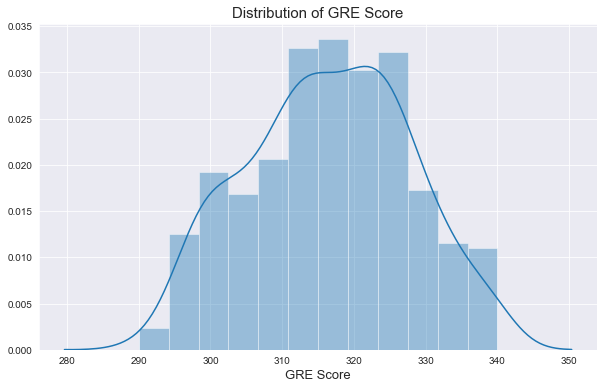

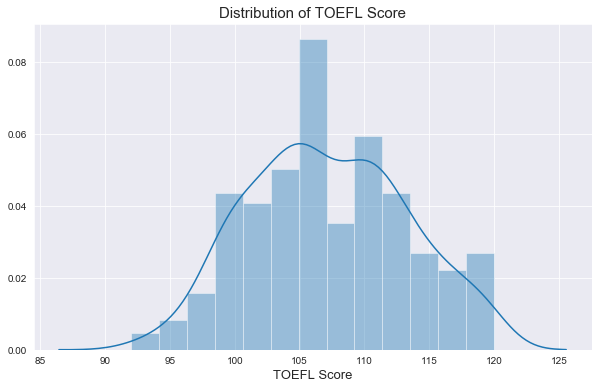

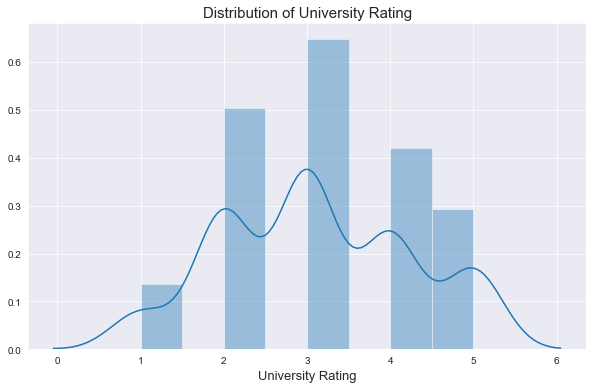

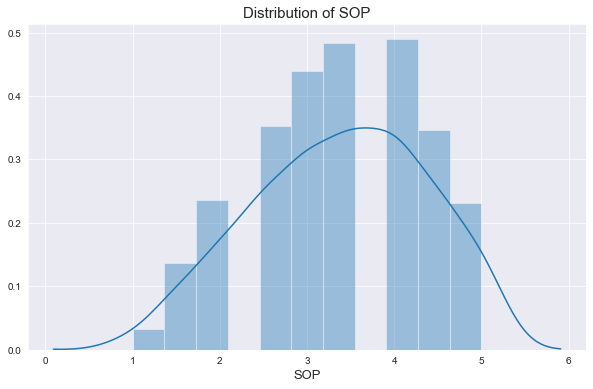

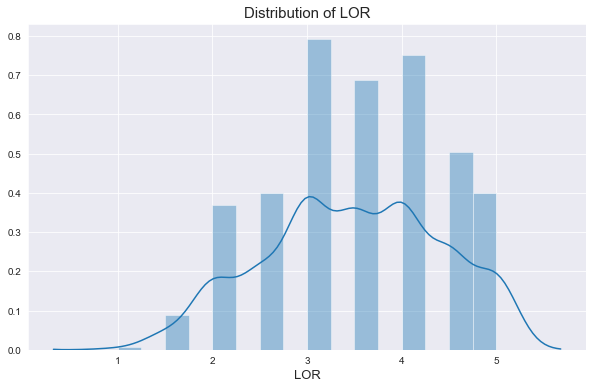

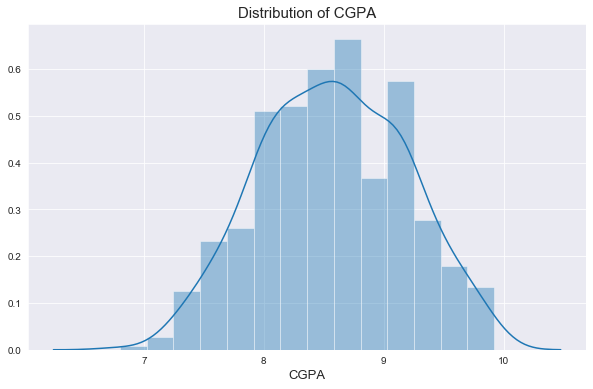

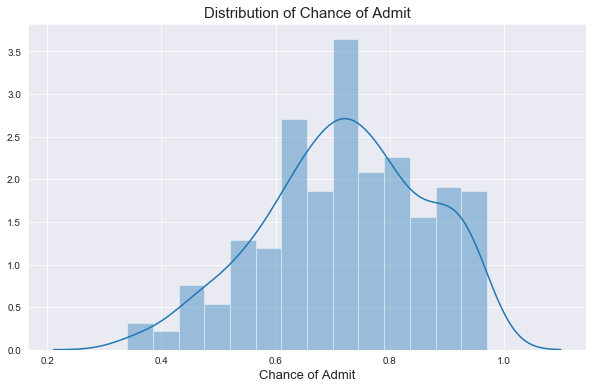

In [14]:
for i in df.columns:
    if i=='Research':
        continue
    else:
        
        plt.figure(figsize=(10,6))
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=13)
        plt.title('Distribution of {}'.format(i),fontsize=15)
        plt.show()
        print('\n')


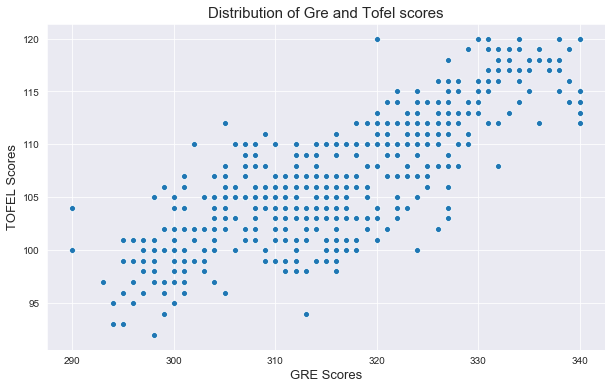

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['TOEFL Score'])
plt.xlabel('GRE Scores',fontsize=13)
plt.ylabel('TOFEL Scores',fontsize=13)
plt.title('Distribution of Gre and Tofel scores',fontsize=15)
plt.show()

- It is justified that people with higher gre scores have higher tofel scores.

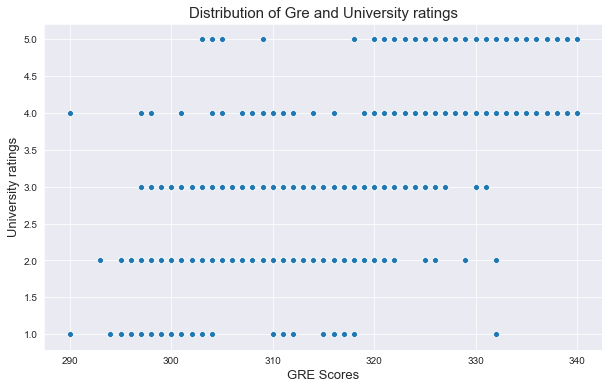

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['University Rating'])
plt.xlabel('GRE Scores',fontsize=13)
plt.ylabel('University ratings',fontsize=13)
plt.title('Distribution of Gre and University ratings',fontsize=15)
plt.show()

- Students with higher gre scores (320 and above) have got admission in University ratings of 4 and 5.
- and gre scores of 300 to 320 have got admission in university ratings of 2 and 3 most when compared to 4.

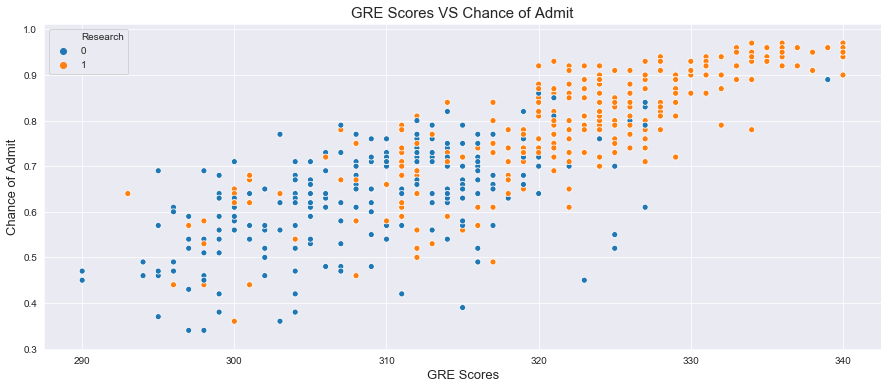

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot(df['GRE Score'],df['Chance of Admit'],hue=df['Research'])
plt.xlabel('GRE Scores',fontsize=13)
plt.ylabel('Chance of Admit',fontsize=13)
plt.title('GRE Scores VS Chance of Admit',fontsize=15)
plt.show()

- Students with higher gre scores having the chances of admission is more.
- with higher gre scores have opted for Research 

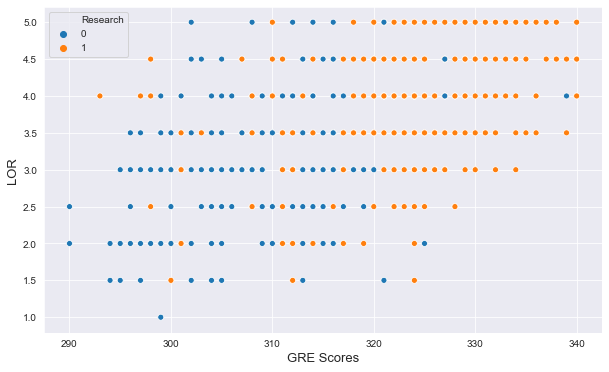

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['LOR'],hue=df['Research'])
plt.xlabel('GRE Scores',fontsize=13)
plt.ylabel('LOR',fontsize=13)
plt.show()

- Students with ratings of (3.5 and above) LOR have opted for research.

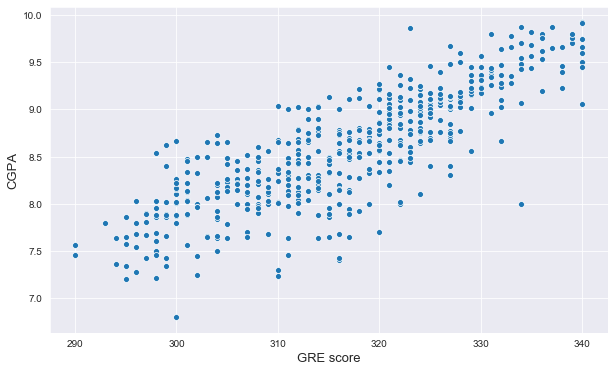

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['CGPA'])
plt.xlabel('GRE score',fontsize=13)
plt.ylabel('CGPA',fontsize=13)
plt.show()

- Students with highergre scores have higher cgpa 

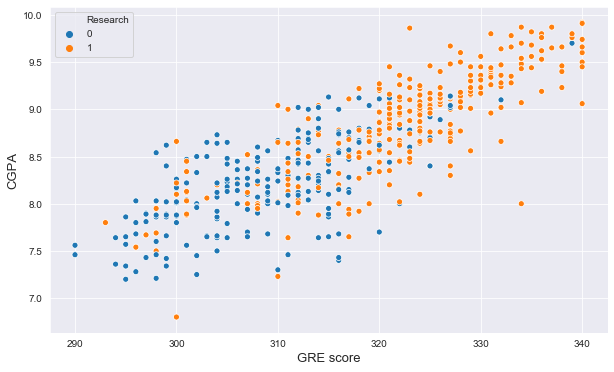

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['CGPA'],hue=df['Research'])
plt.xlabel('GRE score',fontsize=13)
plt.ylabel('CGPA',fontsize=13)
plt.show()

- cgpa 9 and above all  students(max) have opted for research

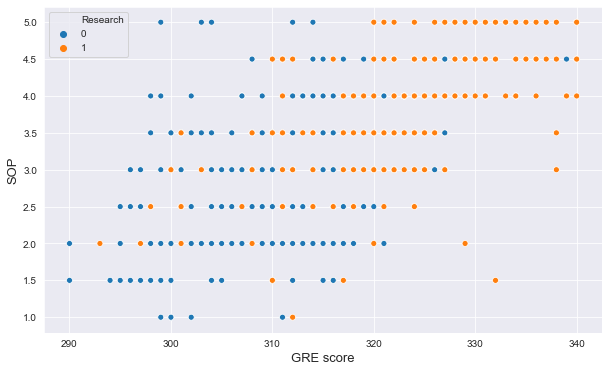

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['SOP'],hue=df['Research'])
plt.xlabel('GRE score',fontsize=13)
plt.ylabel('SOP',fontsize=13)
plt.show()

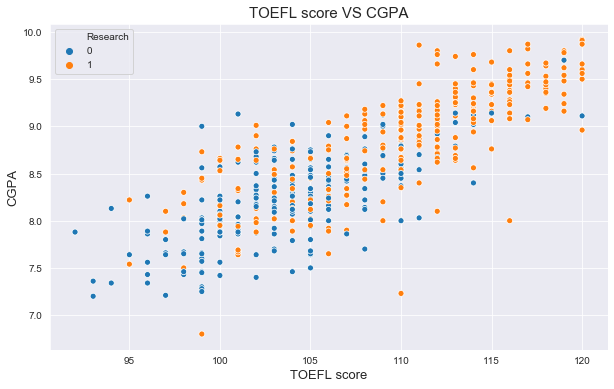

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['TOEFL Score'],df['CGPA'],hue=df['Research'])
plt.xlabel('TOEFL score',fontsize=13)
plt.ylabel('CGPA',fontsize=13)
plt.title('TOEFL score VS CGPA',fontsize=15)
plt.show()

- From 8.0 to 9.0 cgpa,toefl scores are between 100 to 110 .


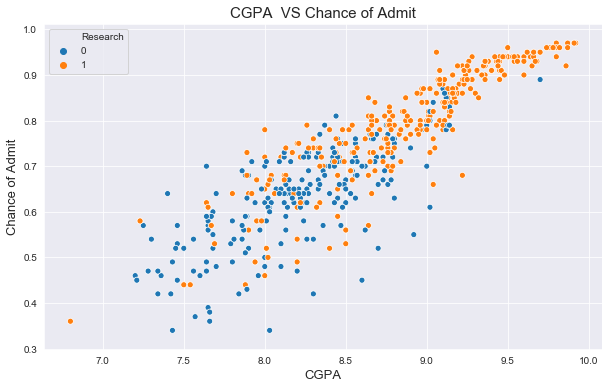

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['CGPA'],df['Chance of Admit'],hue=df['Research'])
plt.xlabel('CGPA',fontsize=13)
plt.ylabel('Chance of Admit',fontsize=13)
plt.title('CGPA  VS Chance of Admit',fontsize=15)
plt.show()

- most of the students cgpa is in between 8.0 to 8.5.
- with higher cgpa chance of admit is high .
- research is opted more when cgpa is 9.0 and above.

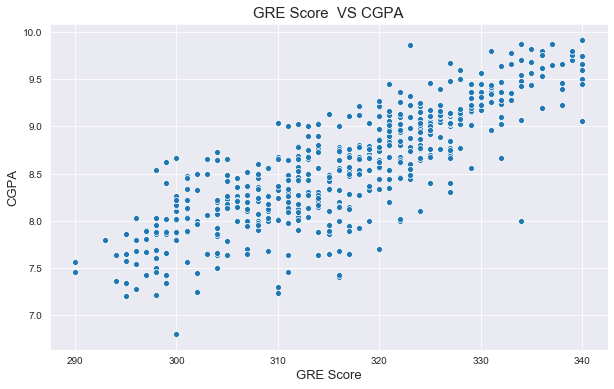

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['GRE Score'],df['CGPA'])
plt.xlabel('GRE Score',fontsize=13)
plt.ylabel('CGPA',fontsize=13)
plt.title('GRE Score  VS CGPA',fontsize=15)
plt.show()

In [25]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


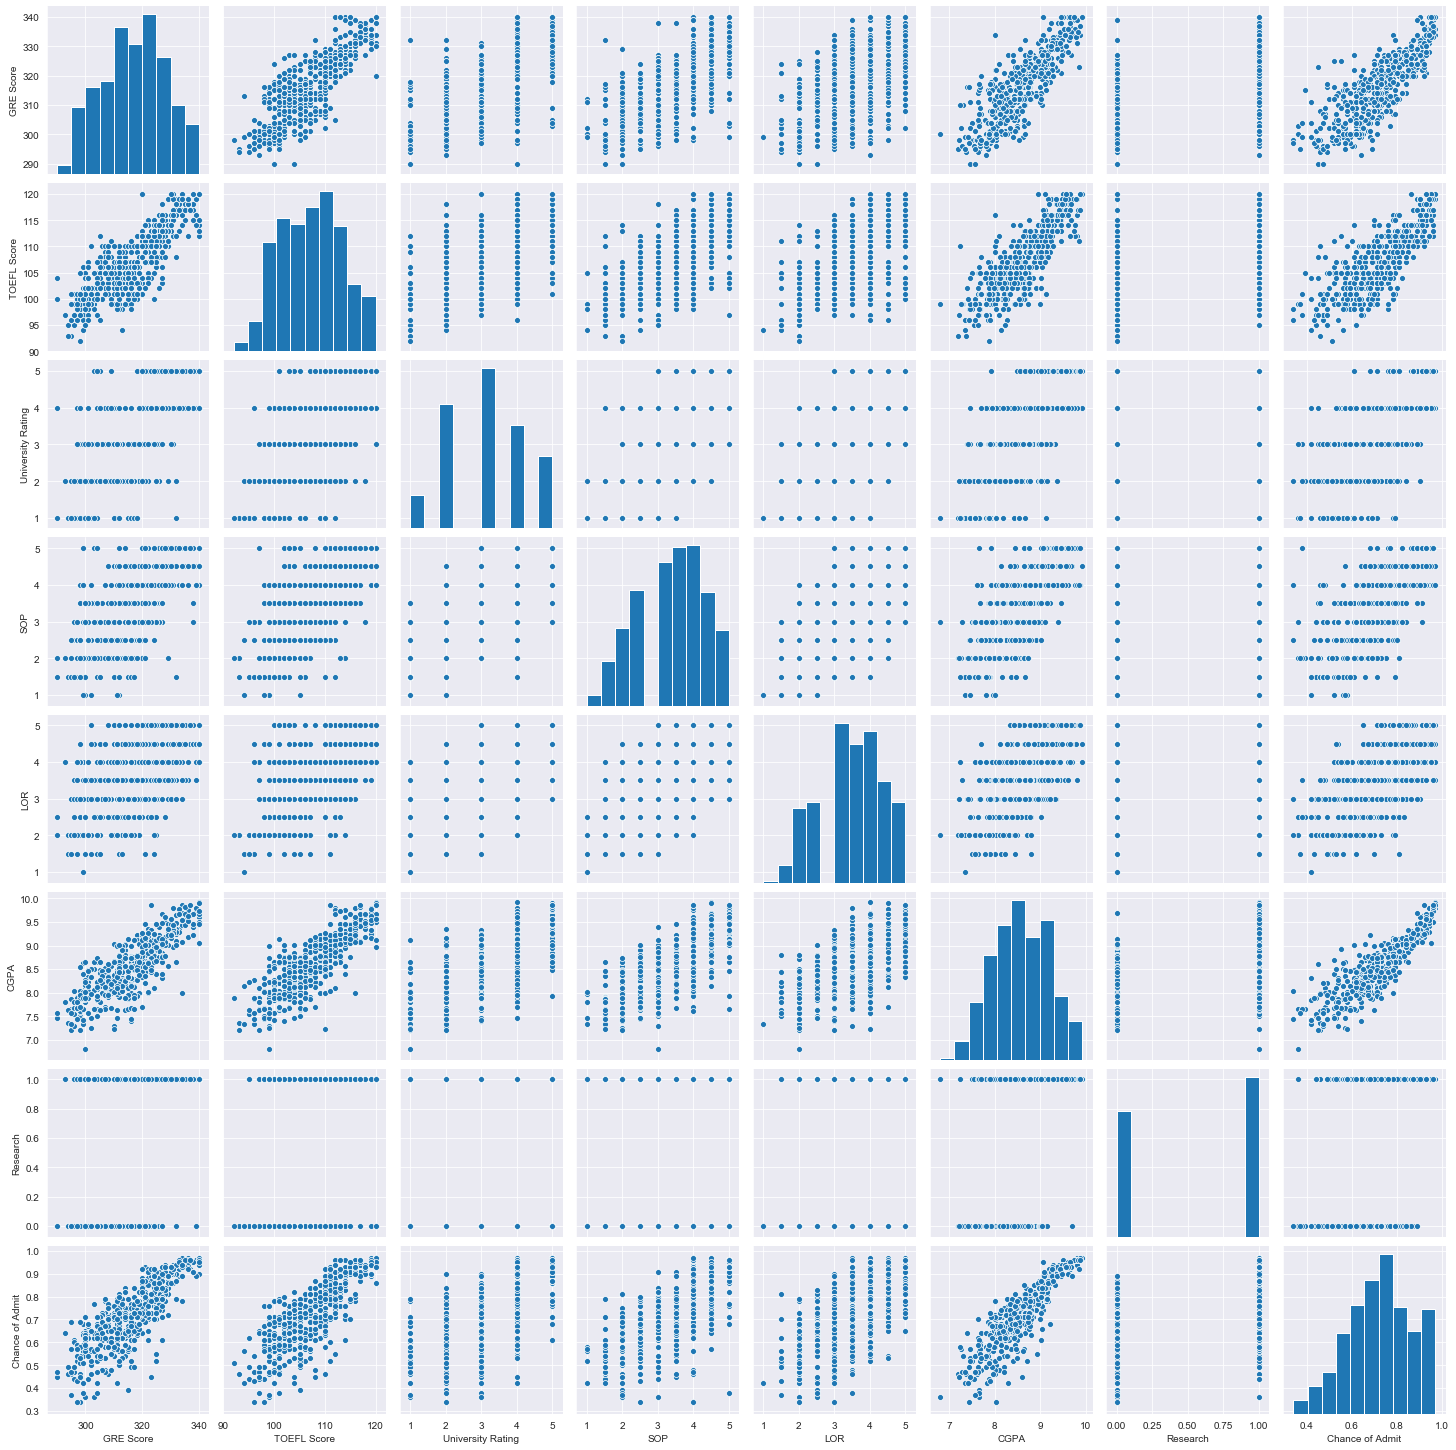

In [26]:
sns.pairplot(df)
plt.show()

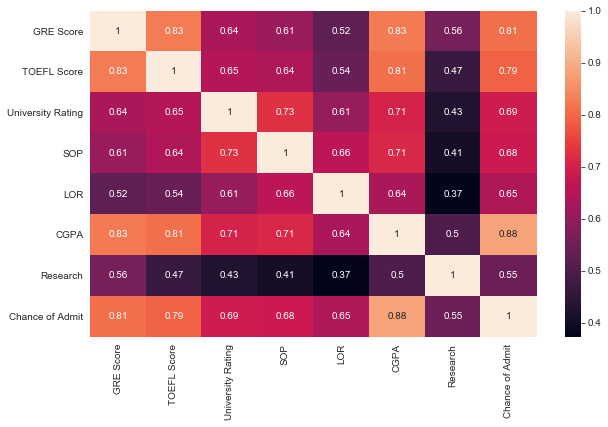

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

- Cgpa and Gre scores have high impact on the chances of admit.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(columns=['Chance of Admit'])
Y=df['Chance of Admit']
X.shape,Y.shape

((500, 7), (500,))

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.23,random_state=23)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((385, 7), (115, 7), (385,), (115,))

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

#metrics evaluation
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipeline_lr=Pipeline([('lr_regression',LinearRegression())])
pipeline_ls=Pipeline([('lasso_regression',Lasso())])
pipeline_rd=Pipeline([('Ridge_regression',Ridge())])
pipeline_dt=Pipeline([('DecisionTree_regression',DecisionTreeRegressor())])
pipeline_knn=Pipeline([('KNN',KNeighborsRegressor())])
pipeline_rf=Pipeline([('RandomForestRegressor',RandomForestRegressor())])
pipeline_ad=Pipeline([('Adaboosting',AdaBoostRegressor())])
pipeline_gb=Pipeline([('GradientBoosting',GradientBoostingRegressor())])
pipeline_xg=Pipeline([('Xgboost',XGBRegressor())])
pipeline_svm=Pipeline([('SVM',SVR())])

In [35]:
pipelines=[pipeline_lr,pipeline_ls,pipeline_rd,pipeline_dt,pipeline_knn,pipeline_rf,pipeline_ad,
          pipeline_gb,pipeline_xg,pipeline_svm]

In [36]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [37]:
pipe_dict={0:'Linear Regression',1: 'Lasso Regression', 2:'Ridge Regression',3:'DecisonTree',4: 'KNN',5:'RandomForestRegressor',6:'Adaboosting',7:'Gradientboosting',
          8:'Xgboost',9:'SVM'}

In [38]:
for i,model in enumerate(pipelines):
    print(pipe_dict[i])
    print('-'*20)
    print('cross_val_score_{} : {}'.format(pipe_dict[i],
                                           (cross_val_score(model,X_train,y_train,cv=5,scoring='explained_variance')).mean()))
    
    
    print('Mean_squared_error_{} : {}'.format(pipe_dict[i],mean_squared_error(y_test,model.predict(X_test))))
    
    print('RMSE_{}: {}'.format(pipe_dict[i],np.sqrt(mean_squared_error(y_test,model.predict(X_test)))))
    
    print('R2square_{} : {}'.format(pipe_dict[i],r2_score(y_test,model.predict(X_test))))
    print('\n')

Linear Regression
--------------------
cross_val_score_Linear Regression : 0.8091151577213538
Mean_squared_error_Linear Regression : 0.0038261666049792674
RMSE_Linear Regression: 0.061856015107499995
R2square_Linear Regression : 0.8021962276132586


Lasso Regression
--------------------
cross_val_score_Lasso Regression : 0.26803719922530117
Mean_squared_error_Lasso Regression : 0.01429715432348019
RMSE_Lasso Regression: 0.11957070846775221
R2square_Lasso Regression : 0.26087090512486566


Ridge Regression
--------------------
cross_val_score_Ridge Regression : 0.8093829271484226
Mean_squared_error_Ridge Regression : 0.0038141404732280593
RMSE_Ridge Regression: 0.06175872791134917
R2square_Ridge Regression : 0.8028179502074899


DecisonTree
--------------------
cross_val_score_DecisonTree : 0.5861697597523036
Mean_squared_error_DecisonTree : 0.007815652173913043
RMSE_DecisonTree: 0.08840617723843194
R2square_DecisonTree : 0.5959492507067623


KNN
--------------------
cross_val_score_KNN

In [39]:
best_r2square=0.0
best_regressor=0
best_pipeline=''

In [40]:
for i,model in enumerate(pipelines):
     if r2_score(y_test,model.predict(X_test))>best_r2square:
            best_r2square=r2_score(y_test,model.predict(X_test))
            
            best_pipeline=model
            best_regressor=i
print("Regressor with best r2square is {}".format(pipe_dict[best_regressor]))

Regressor with best r2square is Gradientboosting


### Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

In [42]:
def gridrandomized(feature,clf,X,Y,parameters,scoring):
    if feature=='Random':
        search_obj=RandomizedSearchCV(estimator=clf,param_distributions=parameters,scoring=scoring,n_jobs=-1,cv=5)
    elif feature=='Grid':
        search_obj=GridSearchCV(estimator=clf,param_grid=parameters,scoring=scoring,n_jobs=-1,cv=5)
    
    start=time.time() 
    fit_obj=search_obj.fit(X,Y)
    end=time.time()
    print("The total time taken to execute {}".format(end-start))
    best_obj=fit_obj.best_estimator_
    print((best_obj))
    best_params=fit_obj.best_params_
    print((best_params))
    best_score=fit_obj.best_score_
    print((best_score))
    

In [44]:
pipe=Pipeline([('regressor',RandomForestRegressor())])
grid_param=[
            {
             'regressor':[Lasso()],
             'regressor__alpha':[x for x in [0.1,0.2,0.3,0.5,0.8,1,100]],
             'regressor__normalize':[False,True],
             'regressor__max_iter':[i for i in [1000,1300,1500,1800]]
            },
   
            {
             'regressor':[Ridge()],
             'regressor__alpha':[x for x in [0.1,0.2,0.3,0.5,0.8,1,100]],
             'regressor__normalize':[False,True],
             'regressor__max_iter':[i for i in [1000,1300,1500]]
             },
    
            {
             'regressor':[KNeighborsRegressor()],
             'regressor__n_neighbors':[x for x in range(5,40,3)],
             'regressor__leaf_size':[30,35,40,45],
             'regressor__weights':['uniform', 'distance'],
             'regressor__algorithm':['auto', 'ball_tree','kd_tree','brute'],
             'regressor__n_jobs':[-1]
            },
    
            {
             'regressor':[DecisionTreeRegressor()],
             'regressor__max_depth':[x for x in range(2,40,3)],
             'regressor__max_features':['auto', 'sqrt'],
             'regressor__min_samples_split': [x for x in [2,3,4,5,6,7,8,9,10,11,12]], 
             'regressor__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]
            },
    
            {
             'regressor':[RandomForestRegressor()],
             'regressor__criterion':['gini','entropy'],
             'regressor__n_estimators':[10,15,20,25,30],
             'regressor__min_samples_leaf':[1,2,3],
             'regressor__min_samples_split':[3,4,5,6,7], 
             'regressor__n_jobs':[-1]
            },
    
            {
            'regressor':[AdaBoostRegressor()],
            'regressor__n_estimators':[50,100],
            'regressor__learning_rate':[0.01,0.05,0.1,0.3,1],
            'regressor__loss':['linear', 'square', 'exponential']
            },
   
            {
             'regressor':[GradientBoostingRegressor()],
             'regressor__learning_rate':[0.1,0.3,0.5,0.6],
             'regressor__n_estimators':[100,150,200],
             'regressor__min_samples_split':[2,3,4],
             'regressor__max_depth':[3,5,7,10],
             'regressor__max_features':['sqrt','auto'],
             'regressor__alpha':[0.9]
            },
    
            {
             'regressor':[XGBRegressor()],
             'regressor__max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
             'regressor__min_child_weight':[1, 3, 5, 7],
             'regressor__gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
             'regressor__colsample_bytree':[0.3, 0.4, 0.5 , 0.7]},
    
            {
             'regressor':[SVR()],
             'regressor__kernel':['linear','rbf'],
             'regressor__C':[6,7,8,9,10,11,12]
            }
            ]
scorings='neg_mean_squared_error'

In [45]:
gridrandomized(feature='Grid',clf=pipe,X=X_train,Y=y_train,scoring=scorings,parameters=grid_param)

The total time taken to execute 471.2996048927307
Pipeline(steps=[('regressor', Ridge(alpha=0.5, max_iter=1000))])
{'regressor': Ridge(alpha=0.5, max_iter=1000), 'regressor__alpha': 0.5, 'regressor__max_iter': 1000, 'regressor__normalize': False}
-0.003696031399302954


In [46]:
from sklearn.pipeline import make_pipeline

In [47]:
pipe=Pipeline([('regressor',Ridge())])
grid_param=[{
    'regressor':[Ridge()],
             'regressor__alpha':[x for x in [0.1,0.2,0.3,0.5,0.8,1,100]],
             'regressor__normalize':[False,True],
             'regressor__max_iter':[i for i in [1000,1300,1500]]
}]
grid_search=GridSearchCV(pipe,grid_param,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
best_model=grid_search.fit(X_train,y_train)

In [48]:
best_model.best_estimator_

Pipeline(steps=[('regressor', Ridge(alpha=0.5, max_iter=1000))])

In [49]:
rd=Ridge(alpha=0.5,max_iter=1000)
model=rd.fit(X_train,y_train)
print("The mse is {}".format(mean_squared_error(y_test,model.predict(X_test))))
print("The rmse is {}".format(np.sqrt(mean_squared_error(y_test,model.predict(X_test)))))
print("The r2square is {}".format(r2_score(y_test,model.predict(X_test))))

The mse is 0.003819823242565137
The rmse is 0.0618047186108402
The r2square is 0.8025241644609376


In [54]:
def ask():
    GRE=int(input("Enter GRE score: "))
    if GRE > 340:
        print("ERROR, Score should be less than 340")
        print("ENTER SCORES AGAIN")
        GRE=int(input("Enter GRE score again: "))
    else:
         pass
        
    TOEFL=int(input('Enter TOEFL score: '))
    if TOEFL>120:
        print("ERROR, Score should be less than 120")
        print("ENTER SCORES AGAIN")
        TOEFL=int(input("Enter TOEFL score again: "))
    else:
        pass
        
    University_Rating=float(input('Enter University_Rating'))
    if University_Rating>5:
        print("ERROR, Ratings should ranges from 0-5")
        print("ENTER RATINGS AGAIN")
        University_Rating=float(input("Enter ratings again: "))
    else:
        pass
        
    SOP=float(input('Enter SOP rating'))
    if SOP>5:
        print("ERROR, Ratings should ranges from 0-5")
        print("ENTER RATINGS AGAIN")
        SOP=float(input("Enter ratings again: "))
    else:
        pass
        
    LOR=float(input('Enter LOR rating'))
    if LOR>5:
        print("ERROR, Ratings should ranges from 0-5")
        print("ENTER RATINGS AGAIN")
        LOR=float(input("Enter ratings again: "))
    else:
        pass
        
    CGPA=float(input('Enter CGPA points'))
    if CGPA>10:
        print("ERROR, CGPA Should ranges from 0-10")
        print("ENTER CGPA AGAIN")
        CGPA=float(input("Enter cgpa again: "))
    else:
        pass
    
    Research=input('Yes or No: ')
    if Research=='Yes':
        Research=1
    elif Research=='No':
        Research=0
    else:
        print( 'enter correctly')
        Research=input('Yes or No')
    
    final=model.predict([[GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research]])
    return "The chance of admit is {}".format(final)

In [55]:
ask()

Enter GRE score: 321
Enter TOEFL score: 109
Enter University_Rating5.6
ERROR, Ratings should ranges from 0-5
ENTER RATINGS AGAIN
Enter ratings again: 3.5
Enter SOP rating5.7
ERROR, Ratings should ranges from 0-5
ENTER RATINGS AGAIN
Enter ratings again: 4.9
Enter LOR rating3.4
Enter CGPA points10.3
ERROR, CGPA Should ranges from 0-10
ENTER CGPA AGAIN
Enter cgpa again: 9.8
Yes or No: Yes


'The chance of admit is [0.90139718]'